### Load all necessary packages

In [1]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

from rpy2.robjects import numpy2ri, pandas2ri

import rpy2.ipython.html
rpy2.ipython.html.init_printing()

import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

from rpy2.rinterface_lib import openrlib

robjects.r('''

## add the full path to folder inside which MetENP R package is installed; relative path may not work

.libPaths( c( .libPaths(), "/home/sumana/appyters/MetENP/R" ))

##.libPaths( c( .libPaths(), "/var/www/html/appyters/MetENP/R" ))

print(.libPaths())
''')
;

[1]

 "/usr/lib64/R/library"          

 "/usr/share/R/library"          

[3]

 "/home/sumana/appyters/MetENP/R"

''

In [2]:
from rpy2.robjects.packages import importr
metenp = importr('MetENP')

In [3]:
print("Study ID:", "ST000915")

Study ID: ST000915


### Start data processing

### Gets metabolomics data, metadata and metabolite info from Metabolomics Workbench using REST service

In [4]:
data_1 = robjects.r['getmwstudies']("ST000915", 
    'data'
)

In [5]:
with openrlib.rlock:
    
    robjects.r.assign('data_1', data_1)
    
    robjects.r('''

    data_1_print = data.frame(apply(data_1, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
    head(data_1_print)

    ''')
    
    pass

### Gets metabolomics data, metadata and metabolite info from Metabolomics Workbench using REST service

In [6]:
metadata = robjects.r['getmwstudies']("ST000915", 
    'factors'
)

In [7]:
robjects.r.assign('metadata', metadata)

robjects.r('''
metadata_print = data.frame(apply(metadata, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(metadata_print)
''')

,,study_id,local_sample_id,subject_type,factors,Diagnosis
0,1,ST000915,NASH005,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
1,2,ST000915,NASH007,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
2,3,ST000915,NASH009,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
3,4,ST000915,NASH013,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
4,5,ST000915,NASH016,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
5,6,ST000915,NASH022,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis


### Associate metabolomics data to the refmet class

In [8]:
refmet_class = robjects.r['convert_refmet'](data_1)

robjects.r.assign('refmet_class', refmet_class)

robjects.r('''

refmet_class_print = data.frame(apply(refmet_class, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(refmet_class_print)

''')

,,metabolite_name,analysis_id,analysis_summary,metabolite_id,...,main_class,sub_class
0,1,"1,2-DG(30:0)",AN001488,Core E Neutral Lipids,ME231190,...,Diradylglycerols,DAG
1,2,"1,2-DG(30:1)",AN001488,Core E Neutral Lipids,ME231189,...,Diradylglycerols,DAG
2,3,"1,2-DG(32:0)",AN001488,Core E Neutral Lipids,ME231196,...,Diradylglycerols,DAG
3,4,"1,2-DG(32:1)",AN001488,Core E Neutral Lipids,ME231195,...,Diradylglycerols,DAG
4,5,"1,2-DG(32:2)",AN001488,Core E Neutral Lipids,ME231194,...,Diradylglycerols,DAG
5,6,"1,2-DG(32:3)",AN001488,Core E Neutral Lipids,ME231193,...,Diradylglycerols,DAG


### This lists each unique metadata factor/independent variable

In [9]:
robjects.r('''
study_facs = data.frame(unique(metadata_print$factors))
''')

,,unique.metadata_print.factors.
0,1,Diagnosis:Cirrhosis
1,2,Diagnosis:NASH
2,3,Diagnosis:Normal
3,4,Diagnosis:Steatosis


### This lists each different analysis terms

In [10]:
robjects.r('''
study_anals = data.frame(unique(data_1_print$analysis_summary))
''')

,,unique.data_1_print.analysis_summary.
0,1,Core G Fatty acids/Eicosanoids
1,2,Core J Sterols
2,3,Core K Prenols/Cardiolipins
3,4,Core E Neutral Lipids
4,5,Core I Sphingolipids
5,6,Core H Phospholipids


### Here, find significant metabolites and the significance of all the analysis summary together. The analysis summary/modes you got in the previous section.

In [11]:
robjects.r.assign('refmet_class', refmet_class)
robjects.r.assign('metcol', 'metabolite_name')
robjects.r.assign('fac1', "Cirrhosis")
robjects.r.assign('fac2', "Normal")
robjects.r.assign('faccol', "Diagnosis")
robjects.r.assign('samcol', 'local_sample_id')
robjects.r.assign('normtype', ['50percent'])
robjects.r.assign('pthres', ['0.10'])
robjects.r.assign('thres_log2foldchangevar', '0.0')
robjects.r.assign('padj', ['BH'])

0,"[1] ""BH"""


In [12]:
robjects.r('''
ptreshnum<-as.numeric(pthres)
thres_log2foldchangenum<-as.numeric(thres_log2foldchangevar)
padjchar<-as.character(padj[1])
''')
;

''

In [13]:
robjects.r.assign('anal',"Core G Fatty acids/Eicosanoids" )

Core G Fatty acids/Eicosanoids


### Find the log2fold change and p value on metabolomics data using a t-test. 

In [14]:
robjects.r('''
analysis_type_sep = "___";
anal_vec = trimws(unlist(strsplit(anal, analysis_type_sep)))
print(anal_vec)
stats_metabolites = significant_met(metabolomics_data=refmet_class_print, met_col='metabolite_name',analysis_type=anal_vec, metadata=metadata, factor1=fac1, factor2=fac2, factor_col=faccol,sample_col='local_sample_id', p_adjust=padjchar,normalization=normtype)
''')
;

[1]

 "Core G Fatty acids/Eicosanoids"

''

In [15]:
robjects.r('''
sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= ptreshnum&abs(stats_metabolites[,"log2Fold_change"])>thres_log2foldchangenum),]
''')
;

''

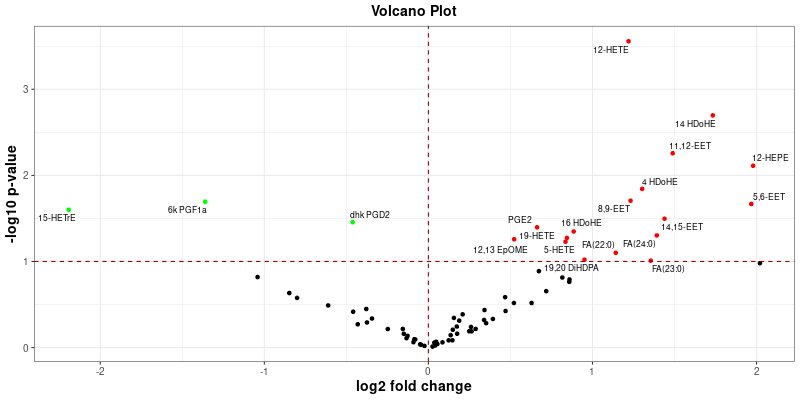

In [16]:
image_png(robjects.r('''
plot_volcano(stats_metabolites, thres_pval= ptreshnum, thres_log2foldchange = thres_log2foldchangenum, TRUE)
'''))

Each color describes a different metabolite group.

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles, and KEGG (if you chose to add in KEGG).

In [17]:
with openrlib.rlock:
    robjects.r('''
    sig_metabolites_kegg_id= map_keggid(sig_metabolites)
    ''')
    pass

#### Check all your significant metabolites have not been assigned metabolite class
Outcome should be 0 elements.

In [18]:
robjects.r('''
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)
''')

Tricosanoic acid


### Count the number of metabolites in each of the metabolite classes and plot them with a bar graph

In [19]:
robjects.r.assign('classtype', ['sub_class'])
robjects.r.assign('thres_log2foldchange_countclass', '0.0')
robjects.r('''
metclassvar <- as.character(classtype[1])
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass=metclassvar, plotting=TRUE, thres_logfC = thres_log2foldchange_countclass)
''')

0,sig_met_count,...
1,plotimg,


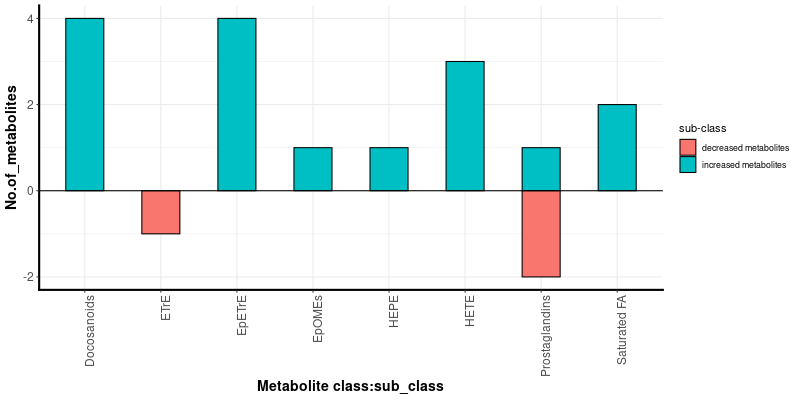

In [20]:
image_png(robjects.r('''
count_changes$plotimg
'''))

### Enrichment score (p-value) for metabolite classes

Calculate the enrichment score (p-value) of each metabolite class. 

Enrichment score (p-value) is calculated through the hypergeometric method as described by Choudhary et al. [https://www.biorxiv.org/content/10.1101/2020.11.20.391912v1].

In [21]:
robjects.r.assign('sigmets', 1)

1


In [22]:
robjects.r('''
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass=metclassvar,enrich_stats="HG",no=sigmets)
''')
;

''

## Plot the enrichment score (p-value) via function plot_met_enrichment

### If no figure shows here, or an error returns, this means no classes had enough significant metabolites. Decrease the minimum number of significant metabolites per class needed and reload/rerun the appyter program.

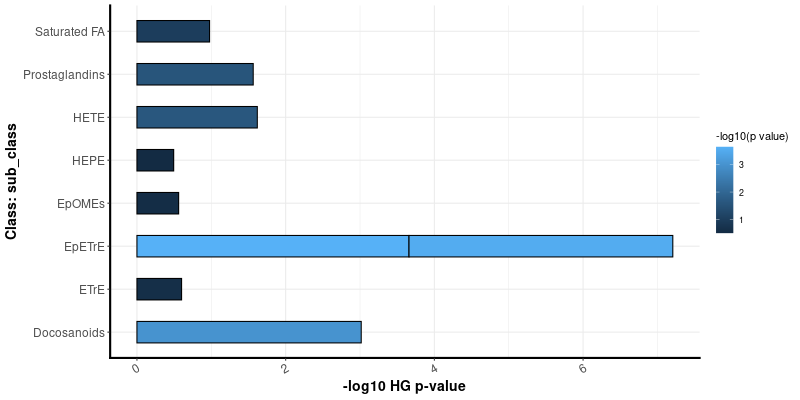

In [23]:
image_png(robjects.r('''
plot_met_enrichment(metenrichment, metclassvar,"HG", no=sigmets)
'''))

### Check the pathways with reactions involving the significant metabolites

In [24]:
robjects.r.assign('studyOrg', 'hsa')
robjects.r('''
met_path = met_pathways(df_metenrichment = metenrichment, studyOrg)
head(met_path)
''')

[1]

 "res is not null"

,,rxn,refmet_name,Exact mass,KEGG ID,...,pathway_id,sps_path_id
0,1,R02265,PGE2,352.2250,C00584,...,rn00590,hsa00590
1,2,R02265,PGE2,352.2250,C00584,...,rn01100,hsa01100
2,3,R02581,PGE2,352.2250,C00584,...,rn00590,hsa00590
3,4,R02581,PGE2,352.2250,C00584,...,rn01100,hsa01100
4,5,R02583,PGE2,352.2250,C00584,...,rn00590,hsa00590
5,6,R02583,PGE2,352.2250,C00584,...,rn01100,hsa01100


### Get pathway enrichment score (p-value).

Once we have the pathway information, we can calculate enrichment score (p-value) of pathways using the hypergeometric scores for each pathway.

For hypergeometric score, we need to know the total number of KEGG compounds that are linked to KEGG pathways. 

N = Total no. of compounds linked to KEGG pathway, 
L = No. of compounds in a pathway, 
M = No. of altered (significant) compounds in a pathway, 
K = Total no. of altered (significant) compounds. 
Then, 
score or p-value = phyper(M-1, L, N-L, K)

This function also utilizes korg dataset from pathview package.

In [25]:
robjects.r.assign('keggTF', ['FALSE'])
robjects.r('''
keggTFchar<-as.character(keggTF[1])
''')

FALSE


In [26]:
# relative paths do not work, exclude the starting / as it gets added automatically when appyter runs
#korgvar = "/home/sumana/appyters/MetENP/static/korg.RData"
#ls_pathvar = "/home/sumana/appyters/MetENP/static/ls_path.RData"
korgvar = "/var/www/html/appyters/MetENP/static/korg.RData"
ls_pathvar = "/var/www/html/appyters/MetENP/static/ls_path.RData"
robjects.r.assign('korgvar', korgvar)
robjects.r.assign('ls_pathvar', ls_pathvar)

/var/www/html/appyters/MetENP/static/ls_path.RData


In [27]:
robjects.r('''
load(korgvar)
load(ls_pathvar)
''')

ls_path


In [28]:
robjects.r('''
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps=studyOrg,padj=padjchar, kegg_comp_path=keggTFchar)
head(kegg_es)
''')

,,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
0,1,Arachidonic acid metabolism,8,75,0.0019807275354484996,0.005942182606345499
1,2,Biosynthesis of unsaturated fatty acids,2,74,0.7590995170259491,0.7590995170259491
2,3,Linoleic acid metabolism,1,28,0.6413510616580714,0.7590995170259491


### Plot pathway network
Only plotting significant pathways (pathways with >= the minimum number significant metabolites). There is no p-value or adjusted p-value threshold applied for the pathways.

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue.

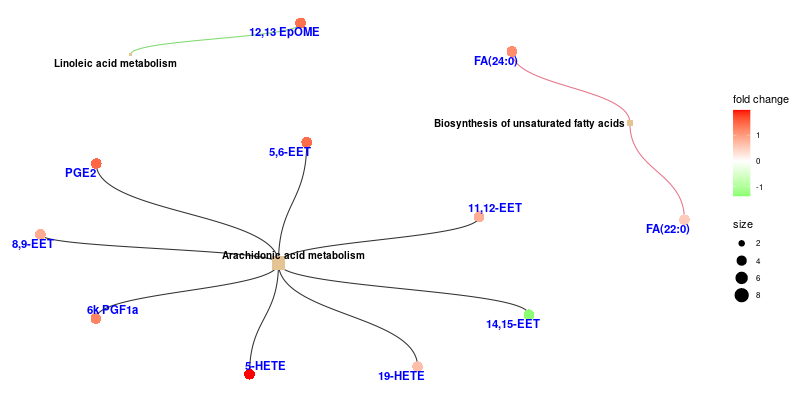

In [29]:
image_png(robjects.r('''
plot_pathway_networks (met_path,kegg_es, TRUE)
'''))

### Heatmap

In [30]:
robjects.r.assign('x_size_heat', 8)
robjects.r.assign('y_size_heat', 6)

6


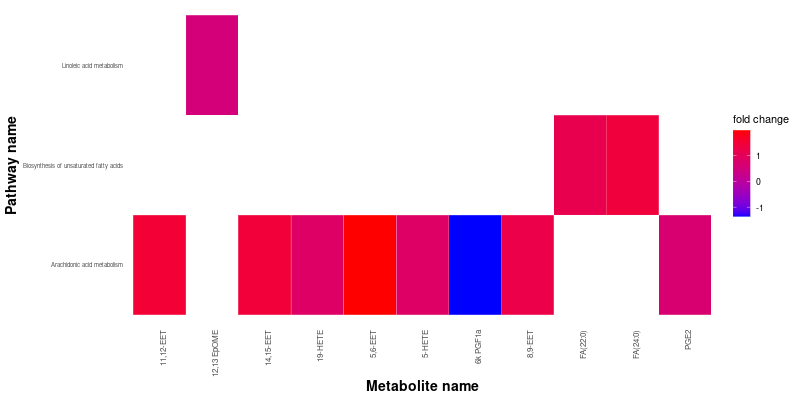

In [31]:
image_png(robjects.r('''
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=x_size_heat, yaxis=y_size_heat)
'''))

### Dotplot

In [32]:
robjects.r.assign('x_size_dot', 8)
robjects.r.assign('y_size_dot', 6)

6


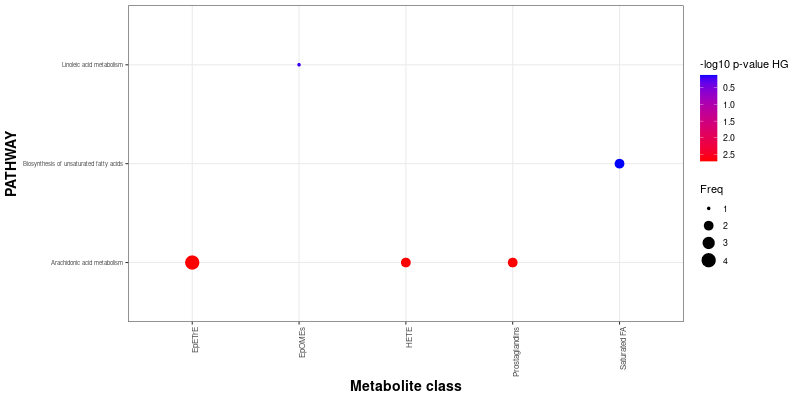

In [33]:
image_png(robjects.r('''
dotplot_met_class_path (met_path, kegg_es, metclassvar,xaxis=x_size_dot,yaxis=y_size_dot)
'''))

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism using KEGG database.

In [34]:
robjects.r('''
met_gene_info = enzyme_gene_info (metenrichment, studyOrg, metclassvar)
head(met_gene_info)
''')

,,orthology_id,ORTHOLOGY,gene_id,gene_name,...,EQUATION_more,ENZYME
0,1,K00079,carbonyl reductase 1 [EC:1.1.1.184 1.1.1.189 1.1.1.197],"CDS ""873""","[1] ""(RefSeq) carbonyl reductase 1""",...,"[1] ""Prostaglandin F2alpha + NADP+ <=> Prostaglandin E2 + NADPH + H+""","[1] ""1.1.1.184"" ""1.1.1.189"""
1,2,K00084,carbonyl reductase 3 [EC:1.1.1.184],"CDS ""874""","[1] ""(RefSeq) carbonyl reductase 3""",...,"[1] ""Prostaglandin F2alpha + NADP+ <=> Prostaglandin E2 + NADPH + H+""","[1] ""1.1.1.184"" ""1.1.1.189"""
2,3,K00432,glutathione peroxidase [EC:1.11.1.9],"CDS ""257202""","[1] ""(RefSeq) glutathione peroxidase 6""",...,"[1] ""2 Glutathione + 5(S)-HPETE <=> Glutathione disulfide + 5(S)-HETE + H2O""","[1] ""1.11.1.9"""
3,4,K00432,glutathione peroxidase [EC:1.11.1.9],"CDS ""2876""","[1] ""(RefSeq) glutathione peroxidase 1""",...,"[1] ""2 Glutathione + 5(S)-HPETE <=> Glutathione disulfide + 5(S)-HETE + H2O""","[1] ""1.11.1.9"""
4,5,K00432,glutathione peroxidase [EC:1.11.1.9],"CDS ""2877""","[1] ""(RefSeq) glutathione peroxidase 2""",...,"[1] ""2 Glutathione + 5(S)-HPETE <=> Glutathione disulfide + 5(S)-HETE + H2O""","[1] ""1.11.1.9"""
5,6,K00432,glutathione peroxidase [EC:1.11.1.9],"CDS ""2878""","[1] ""(RefSeq) glutathione peroxidase 3""",...,"[1] ""2 Glutathione + 5(S)-HPETE <=> Glutathione disulfide + 5(S)-HETE + H2O""","[1] ""1.11.1.9"""


#### Get the information if metabolite is a reactant or substrate

In [35]:
robjects.r('''
rclass_info = react_substrate(met_gene_info)
head(rclass_info)
''')

,,orthology_id,ORTHOLOGY,gene_id,gene_name,...,ENZYME,reactant_product
0,1,K00079,carbonyl reductase 1 [EC:1.1.1.184 1.1.1.189 1.1.1.197],"CDS ""873""","[1] ""(RefSeq) carbonyl reductase 1""",...,"[1] ""1.1.1.184"" ""1.1.1.189""",Product
1,2,K00084,carbonyl reductase 3 [EC:1.1.1.184],"CDS ""874""","[1] ""(RefSeq) carbonyl reductase 3""",...,"[1] ""1.1.1.184"" ""1.1.1.189""",Product
2,3,K00432,glutathione peroxidase [EC:1.11.1.9],"CDS ""257202""","[1] ""(RefSeq) glutathione peroxidase 6""",...,"[1] ""1.11.1.9""",Product
3,4,K00432,glutathione peroxidase [EC:1.11.1.9],"CDS ""2876""","[1] ""(RefSeq) glutathione peroxidase 1""",...,"[1] ""1.11.1.9""",Product
4,5,K00432,glutathione peroxidase [EC:1.11.1.9],"CDS ""2877""","[1] ""(RefSeq) glutathione peroxidase 2""",...,"[1] ""1.11.1.9""",Product
5,6,K00432,glutathione peroxidase [EC:1.11.1.9],"CDS ""2878""","[1] ""(RefSeq) glutathione peroxidase 3""",...,"[1] ""1.11.1.9""",Product


#### Get gene info in short form

In [36]:
robjects.r('''
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']
''')

,,Metabolite,orthology_id,ORTHOLOGY,gene_id,...,ENZYME,reactant_product
0,1,PGE2,"K00079, K00084, K05309, K15729, K15730","carbonyl reductase 1 [EC:1.1.1.184 1.1.1.189 1.1.1.197], carbonyl reductase 3 [EC:1.1.1.184], microsomal prostaglandin-E synthase 2 [EC:5.3.99.3], microsomal prostaglandin-E synthase 1 [EC:5.3.99.3], cytosolic prostaglandin-E synthase [EC:5.3.99.3]","873, 874, 80142, 9536, 10728",...,"c(""1.1.1.184"", ""1.1.1.189""), 5.3.99.3",Product
1,2,5-HETE,K00432,glutathione peroxidase [EC:1.11.1.9],"257202, 2876, 2877, 2878, 2880, 2882, 493869",...,1.11.1.9,Product
2,3,"12,13 EpOME","K07409, K07415, K07418, K17689, K17718, K17719, K17721","cytochrome P450 family 1 subfamily A2 [EC:1.14.14.1], cytochrome P450 family 2 subfamily E1 [EC:1.14.14.-], cytochrome P450 family 2 subfamily J [EC:1.14.14.1 1.14.14.73 1.14.14.74 1.14.14.75], cytochrome P450 family 3 subfamily A4 [EC:1.14.13.32 1.14.14.55 1.14.14.56 1.14.14.57 1.14.14.73 1.14.14.-], cytochrome P450 family 2 subfamily C8 [EC:1.14.14.1], cytochrome P450 family 2 subfamily C9 [EC:1.14.14.51 1.14.14.52 1.14.14.53 1.14.14.-], cytochrome P450 family 2 subfamily C19 [EC:1.14.14.51 1.14.14.52 1.14.14.53 1.14.14.75 1.14.14.-]","1544, 1571, 1573, 1576, 1558, 1559, 1557",...,"c(""1.14.14.1"", ""1.14.14.-"")",Product
3,4,19-HETE,"K07415, K07418, K07422, K17721, K17728","cytochrome P450 family 2 subfamily E1 [EC:1.14.14.-], cytochrome P450 family 2 subfamily J [EC:1.14.14.1 1.14.14.73 1.14.14.74 1.14.14.75], long-chain fatty acid omega-monooxygenase [EC:1.14.14.80], cytochrome P450 family 2 subfamily C19 [EC:1.14.14.51 1.14.14.52 1.14.14.53 1.14.14.75 1.14.14.-], cytochrome P450 family 4 subfamily F8 [EC:1.14.14.1]","1571, 1573, 113612, 1557, 11283",...,"c(""1.14.14.1"", ""1.14.14.80"", ""1.14.14.-"")",Product
4,5,"8,9-EET","K07418, K08726, K17709, K17719","cytochrome P450 family 2 subfamily J [EC:1.14.14.1 1.14.14.73 1.14.14.74 1.14.14.75], soluble epoxide hydrolase / lipid-phosphate phosphatase [EC:3.3.2.10 3.1.3.76], cytochrome P450 family 2 subfamily B6 [EC:1.14.14.-], cytochrome P450 family 2 subfamily C9 [EC:1.14.14.51 1.14.14.52 1.14.14.53 1.14.14.-]","1573, 2053, 1555, 1559",...,"c(""1.14.14.1"", ""1.14.14.-""), 3.3.2.10","Product, Substrate"
5,6,"14,15-EET","K07418, K08726, K17709, K17718, K17719","cytochrome P450 family 2 subfamily J [EC:1.14.14.1 1.14.14.73 1.14.14.74 1.14.14.75], soluble epoxide hydrolase / lipid-phosphate phosphatase [EC:3.3.2.10 3.1.3.76], cytochrome P450 family 2 subfamily B6 [EC:1.14.14.-], cytochrome P450 family 2 subfamily C8 [EC:1.14.14.1], cytochrome P450 family 2 subfamily C9 [EC:1.14.14.51 1.14.14.52 1.14.14.53 1.14.14.-]","1573, 2053, 1555, 1558, 1559",...,"c(""1.14.14.1"", ""1.14.14.-""), 3.3.2.10","Product, Substrate"
6,7,"5,6-EET","K07418, K08726, K17709","cytochrome P450 family 2 subfamily J [EC:1.14.14.1 1.14.14.73 1.14.14.74 1.14.14.75], soluble epoxide hydrolase / lipid-phosphate phosphatase [EC:3.3.2.10 3.1.3.76], cytochrome P450 family 2 subfamily B6 [EC:1.14.14.-]","1573, 2053, 1555",...,"c(""1.14.14.1"", ""1.14.14.-""), 3.3.2.10","Product, Substrate"
7,8,"11,12-EET","K07418, K08726, K17709, K17718, K17719","cytochrome P450 family 2 subfamily J [EC:1.14.14.1 1.14.14.73 1.14.14.74 1.14.14.75], soluble epoxide hydrolase / lipid-phosphate phosphatase [EC:3.3.2.10 3.1.3.76], cytochrome P450 family 2 subfamily B6 [EC:1.14.14.-], cytochrome P450 family 2 subfamily C8 [EC:1.14.14.1], cytochrome P450 family 2 subfamily C9 [EC:1.14.14.51 1.14.14.52 1.14.14.53 1.14.14.-]","1573, 2053, 1555, 1558, 1559",...,"c(""1.14.14.1"", ""1.14.14.-""), 3.3.2.10","Product, Substrate"
